 # Problem Statement

- Task 1:- Prepare a complete data analysis report on the concrete data.

- Task 2:- Create a machine learning model which can predict the future strength of a concrete mix, based on its constituents’ composition and also the age of the mix.



# Importing the Libraries :


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Loading the data:

In [2]:
df=pd.read_csv('concrete.csv')
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# Domain Analysis for Concrete Strength Prediction:
- The given dataset is related to the prediction of concrete compressive strength, which is a crucial factor in assessing the performance of concrete in construction. The dataset includes various features that describe the composition of the concrete mix and its curing conditions.
  1. The dataset appears to be suitable for supervised learning as it includes a target variable (Strength) that can be predicted based on the other features.
  2. The features include a mix of numerical (float, int) and representational (e.g., age) types, indicating a need for preprocessing and scaling depending on the chosen machine learning algorithms.
   3. There are no explicit categorical features in this dataset; all features are numerical or ordinal.
   4. The dataset includes a time-related feature: "Age," representing the curing age of the concrete.
   5. The target variable is "Strength," representing the compressive strength of the concrete. This variable is crucial for assessing the quality of the concrete.
   6. Challenges in this domain may include understanding the intricate relationships between the various components of the concrete mix and the compressive strength. Domain expertise is crucial for interpreting the results correctly.


# Basic checks

In [10]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
col=df.columns
col

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [7]:
df.age.value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

In [8]:
df.age.unique

<bound method Series.unique of 0        28
1        28
2       270
3       365
4       360
       ... 
1025     28
1026     28
1027     28
1028     28
1029     28
Name: age, Length: 1030, dtype: int64>

In [13]:
df.shape

(1030, 9)

In [14]:
df.size

9270

In [15]:
df.notnull().sum()

cement          1030
slag            1030
ash             1030
water           1030
superplastic    1030
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64

In [9]:
# Displaying descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### Insights:

- Count:

    1. Count represents the number of observations or data points in each column.
    2. For all columns, there are 1030 data points.
- Mean (Average):

    1. The mean is the average value of the data.
    2. For example, the mean cement content is approximately 281.17.
- Standard Deviation (std):

    1. Standard deviation measures the amount of variation or dispersion in a set of values.
    2. For instance, the standard deviation of the cement column is approximately 104.51.
- Minimum (min):

    1. The minimum value is the smallest observation in the dataset.
    2. For example, the minimum value for the age column is 1.
- 25th Percentile (25% or Q1):

    1. The 25th percentile is the value below which 25% of the data falls.
    2. It represents the lower quartile of the data.
    3. For instance, the 25th percentile of the superplastic column is 0.
- 50th Percentile (Median or 50% or Q2):

     1. The median is the middle value of the dataset.
     2. It represents the value below which 50% of the data falls.
     3. For example, the median value for the fineagg column is 779.5.
- 75th Percentile (75% or Q3):

     1. The 75th percentile is the value below which 75% of the data falls.
     2. It represents the upper quartile of the data.
    3. For instance, the 75th percentile of the age column is 56.
- Maximum (max):

    1. The maximum value is the largest observation in the dataset.
    2. For example, the maximum value for the strength column is 82.6.



# Exploratory Data Analysis(EDA):


- Hence the basic checks are enquired and moves to the EDA(Exploratory Data Analysis)
- In general the EDA is exploring the data through the various types of plots i.e., Graphs
- There are Three types of Analysis for plots
    - 1.Uni-Variate Analysis:-It allows to check only one feature analysis at a time.
       - ex: Hist plot,Dist plot,Count plot,Box plot,RUG plot,Line plot...etc.
    - 2.Bi-Variate Analysis:-It allows to check two feature analysis at a time.
       - ex: Scatter plot ,Line plot, Box plot,...etc.
    - 3.Multivariate Analysis:-It allows to check whole data at a time.
       - ex: Heat map, Pair plot,..etc.

## Univariate Analysis

In general box plot is used for both uni and bi variate analysis.

Here in order to detect the outliers we used boxplot.

In [16]:
!pip install sweetviz

In [18]:
import warnings
warnings.filterwarnings("ignore")

import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(df)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_R

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


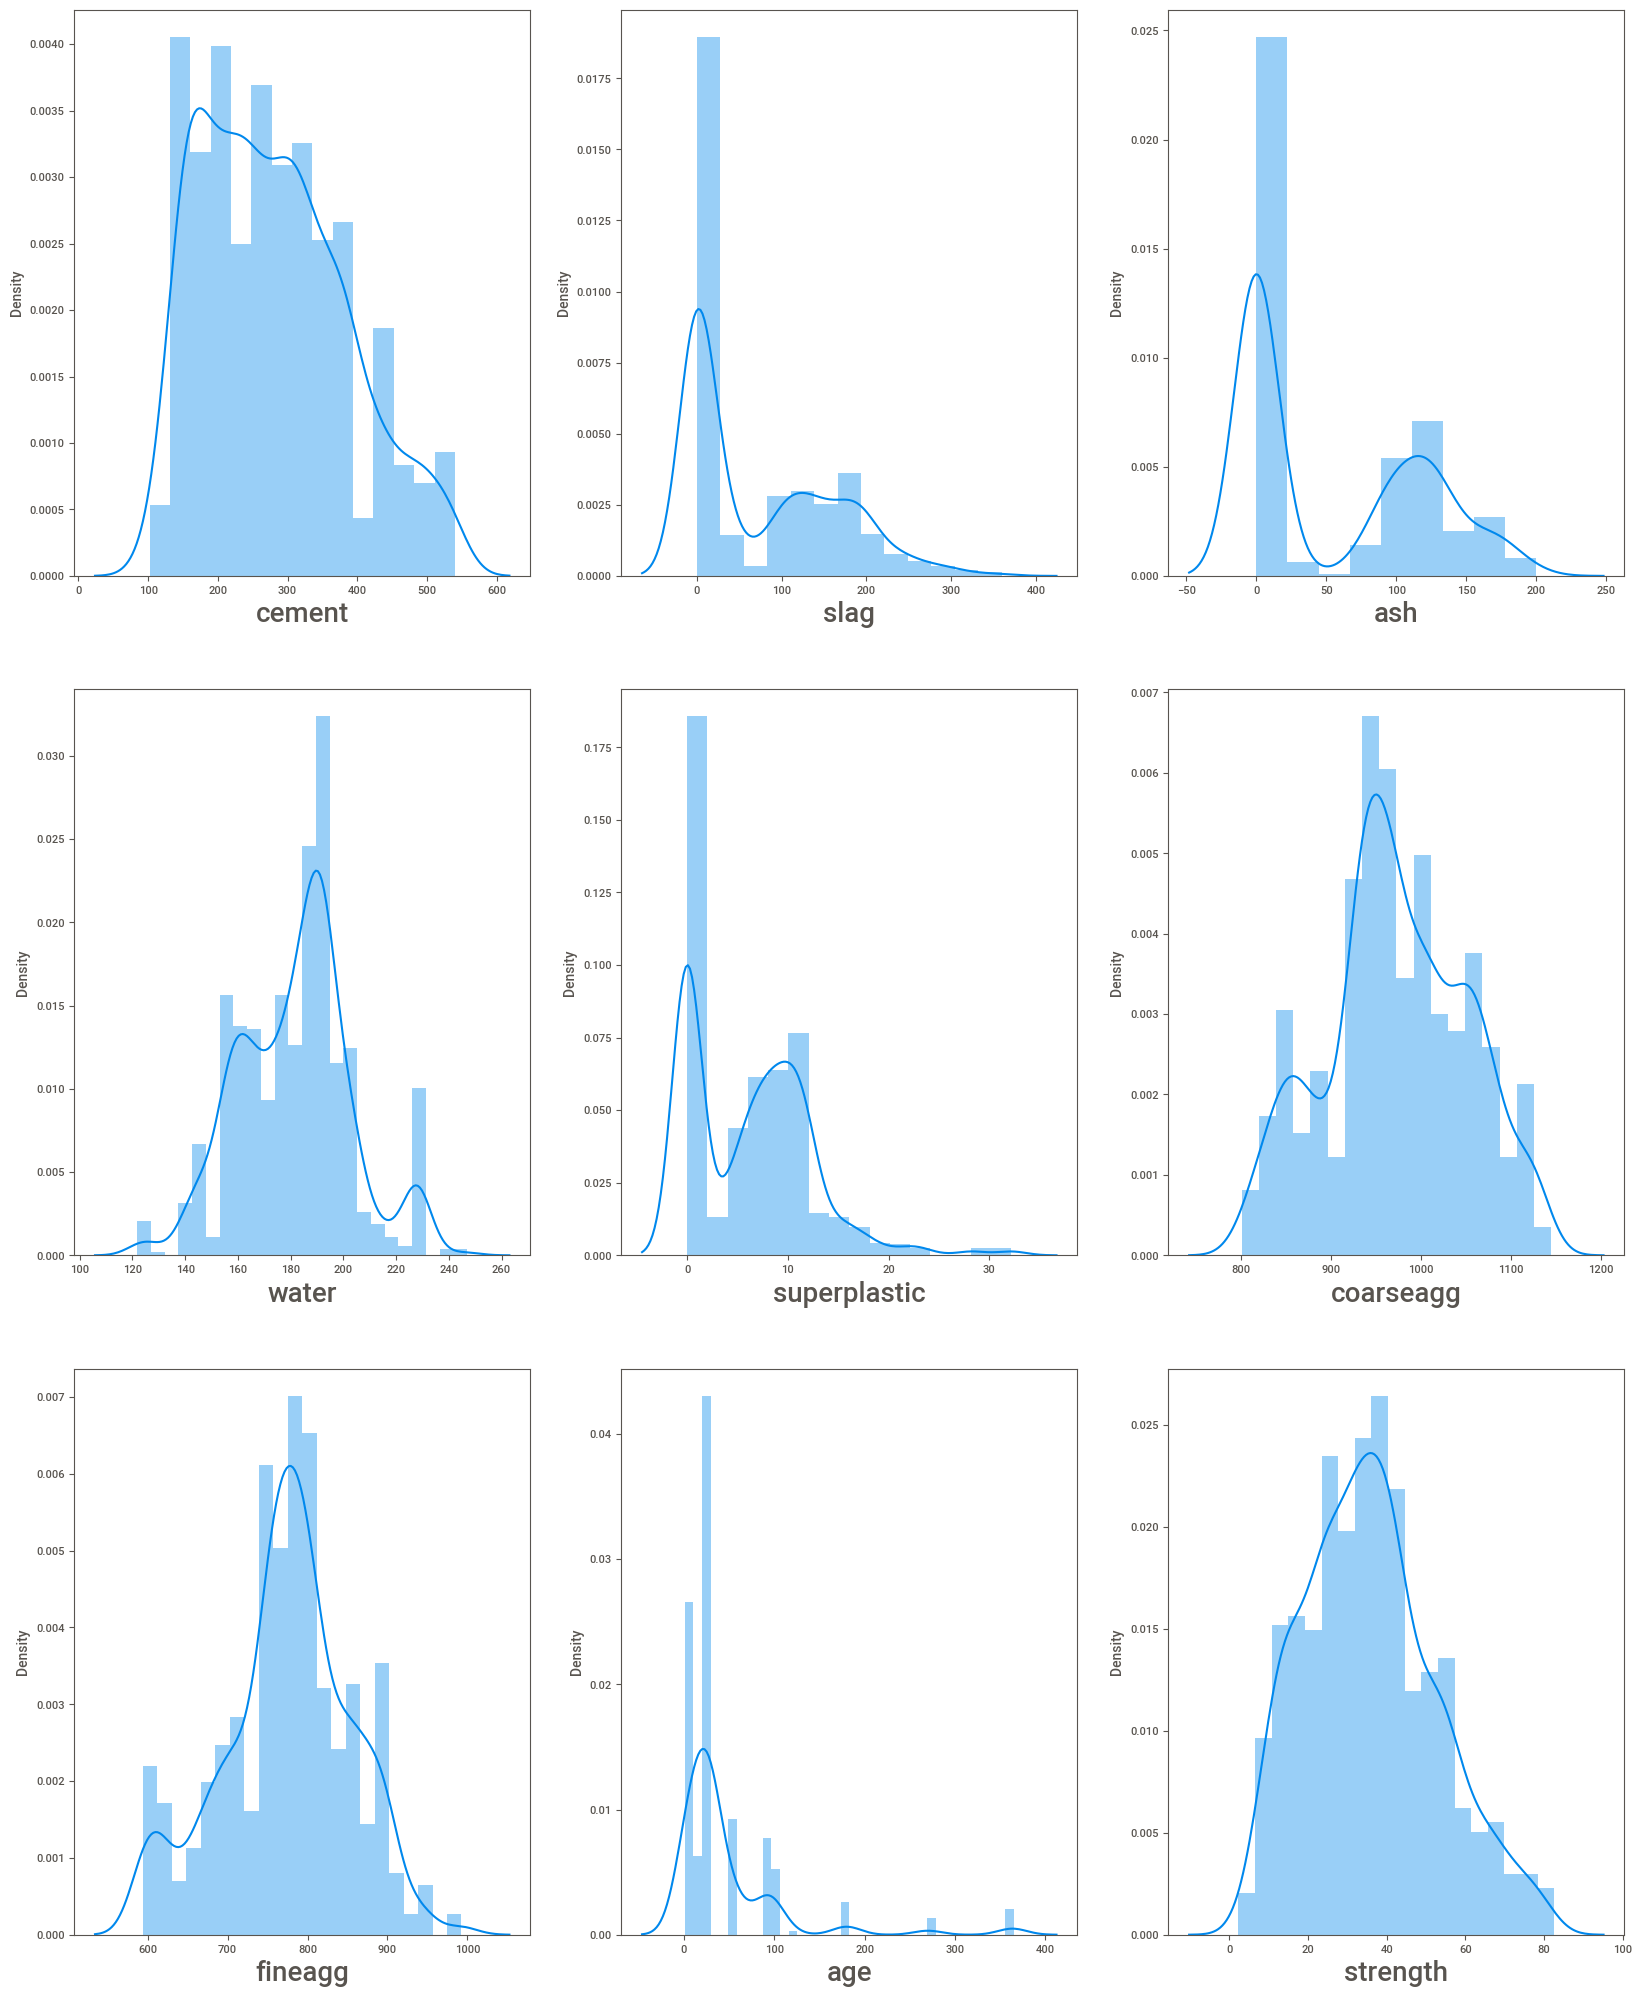

In [20]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

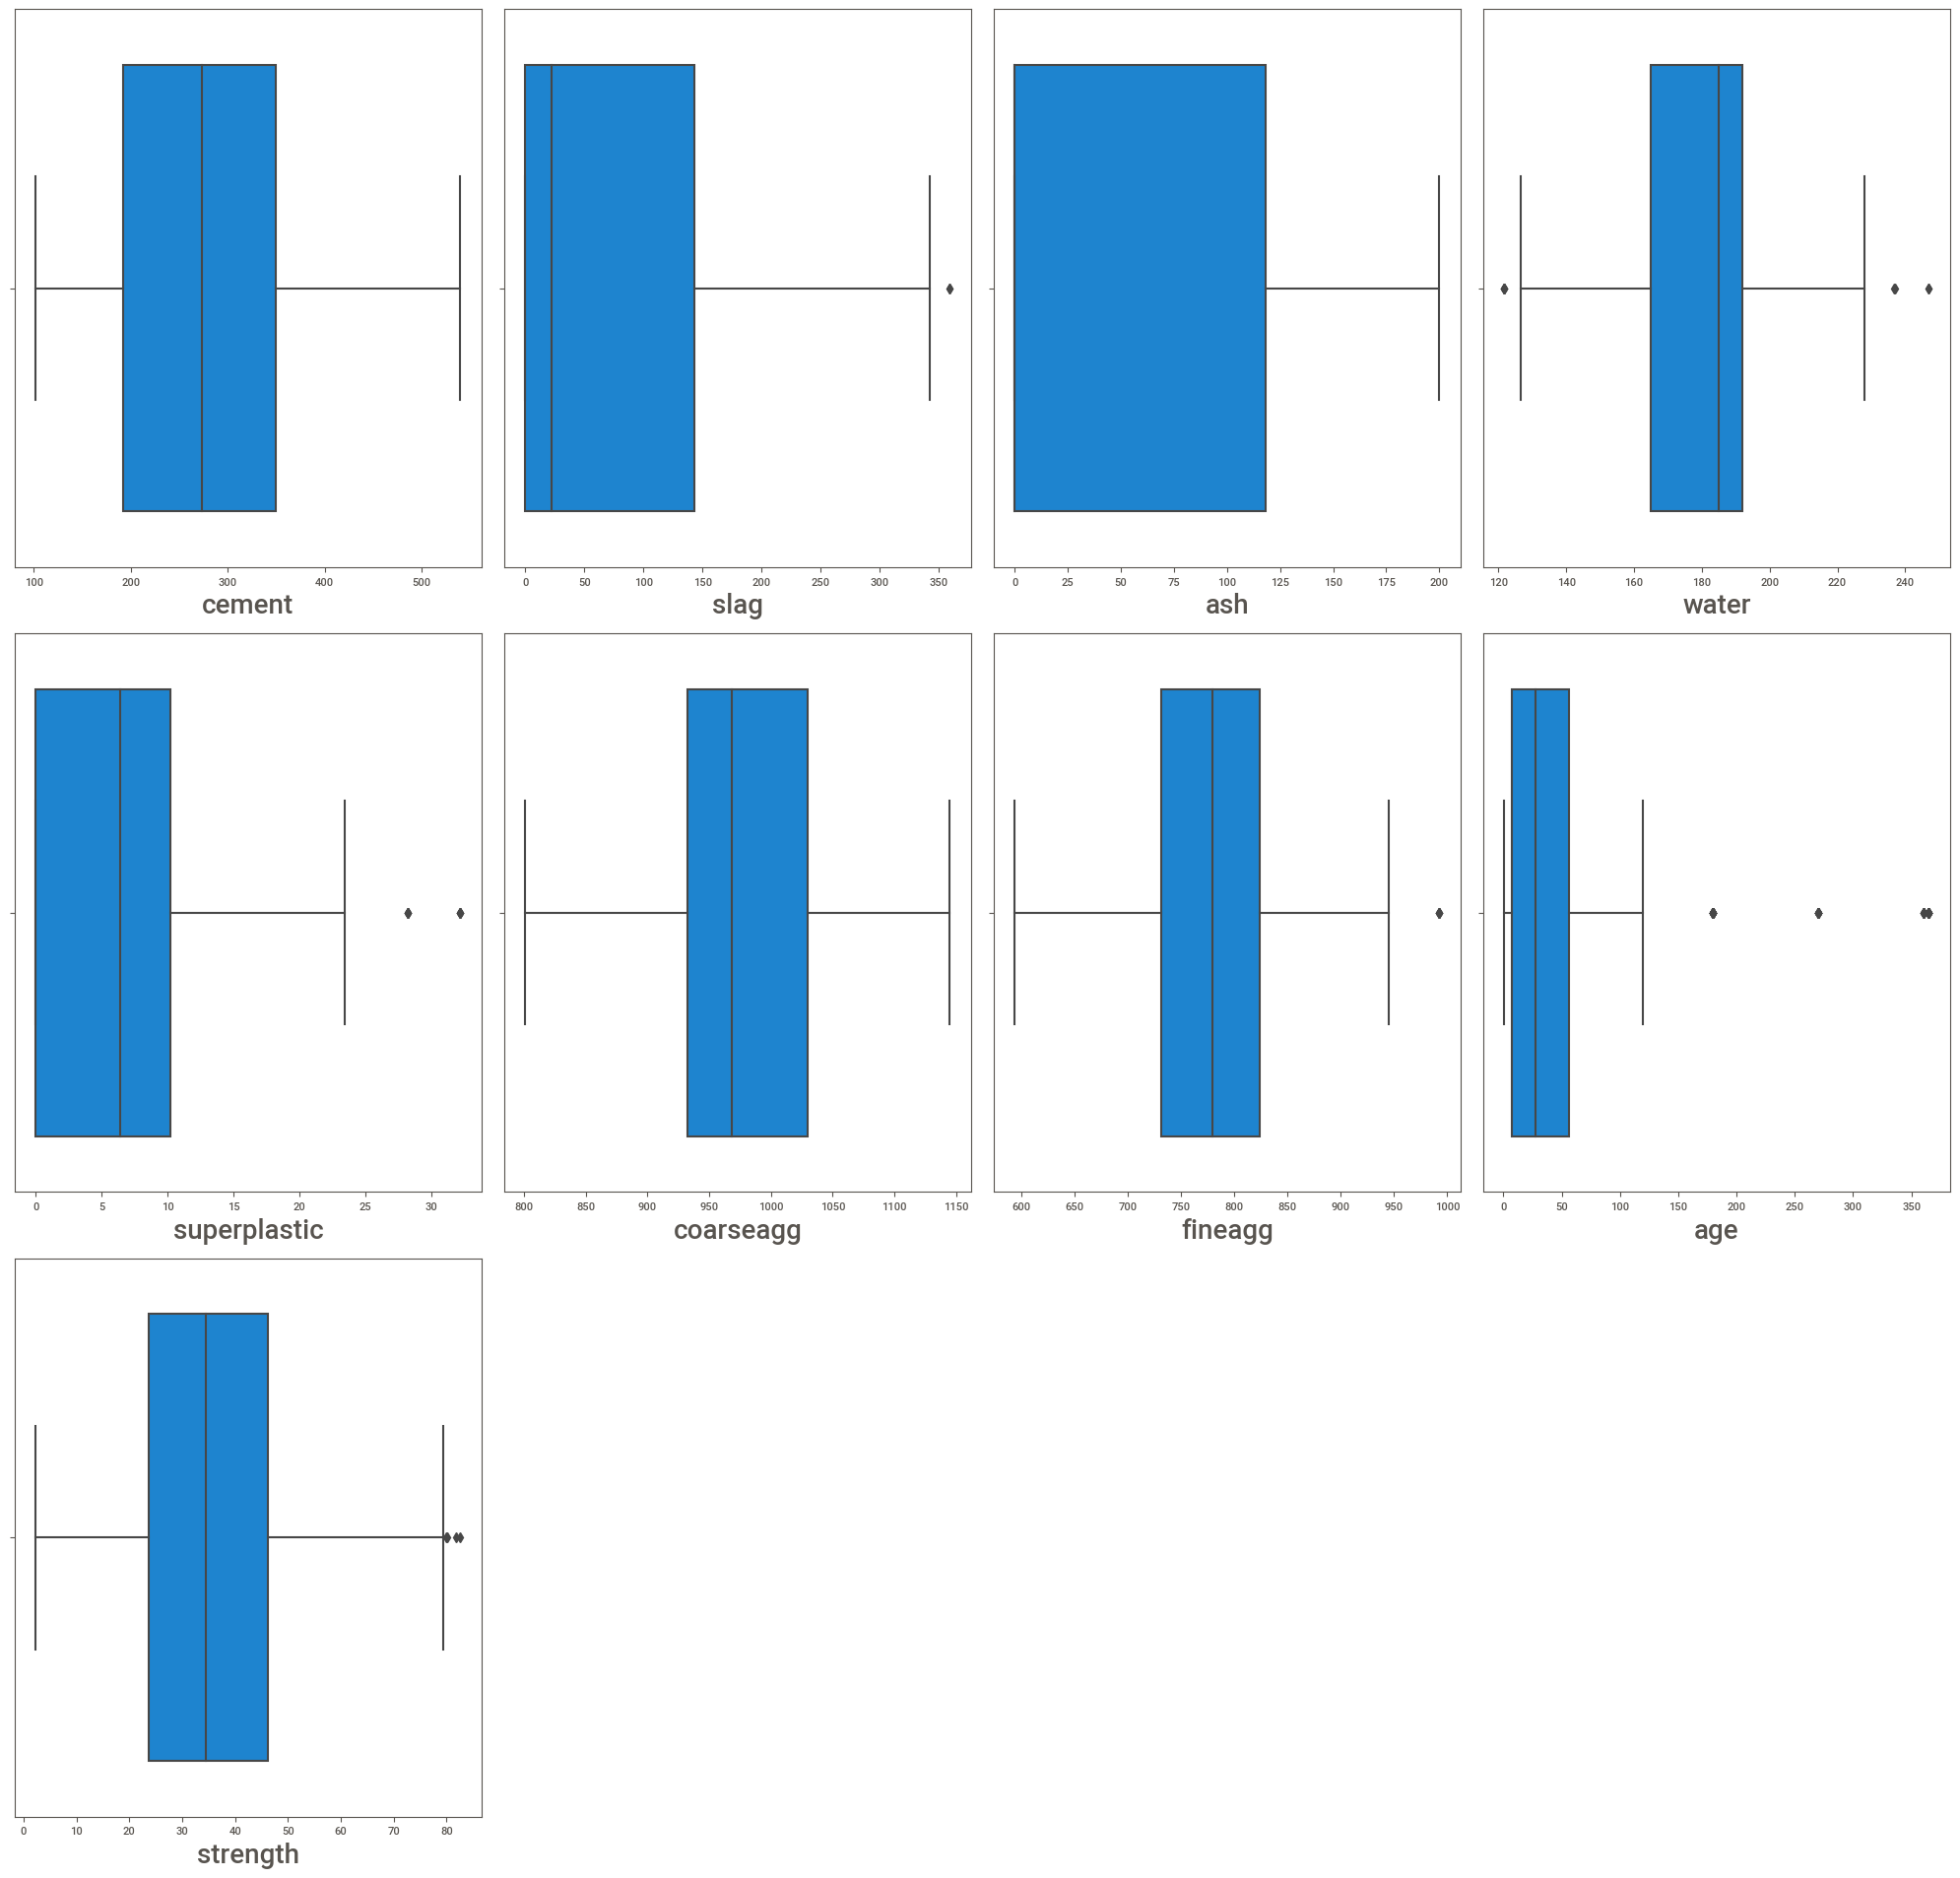

In [21]:
#boxplot(univariate)
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in df:#accessing the columns
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=df[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        #plt.ylabel('Price',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

# Feature Engineering:
- Feature engineering is an important area in the field of machine learning and data analysis. It helps in data cleaning process where data scientists and analysts spend most of their time on. Here are few examples of feature engineering techniques,

1) Outlier detection and removal
2) One hot encoding
3) Handling missing values 
4) Scaling

# Dealing with Outliers :

  1. Outliers are extreme values that deviate significantly from the general pattern of a dataset. Addressing outliers is crucial in data preprocessing to prevent them from unduly influencing statistical analyses or machine learning models. 
  2. Outliers can skew summary statistics and affect the accuracy of predictive models.

In [23]:
from scipy import stats

# Initialize a dictionary to store outlier bounds for each column
outlier_bounds = {}

# Iterate through each column in your dataset
for column in df.columns:
    IQR = stats.iqr(df[column], interpolation='midpoint')
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the lower and upper bounds for potential outliers
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR

    # Store the outlier bounds in the dictionary
    outlier_bounds[column] = {'min_limit': min_limit, 'max_limit': max_limit}

In [24]:
# Replace outliers in the 'superplastic' column
df.loc[df['superplastic'] < outlier_bounds['superplastic']['min_limit'], 'superplastic'] = np.median(df['superplastic'])
df.loc[df['superplastic'] > outlier_bounds['superplastic']['max_limit'], 'superplastic'] = np.median(df['superplastic'])  

# Replace outliers in the 'water' column
df.loc[df['water'] < outlier_bounds['water']['min_limit'], 'water'] = np.median(df['water'])
df.loc[df['water'] > outlier_bounds['water']['max_limit'], 'water'] = np.median(df['water']) 

# Replace outliers in the 'Age' column
df.loc[df['age'] < outlier_bounds['age']['min_limit'], 'age'] = np.median(df['age'])  
df.loc[df['age'] > outlier_bounds['age']['max_limit'], 'age'] = np.median(df['age'])

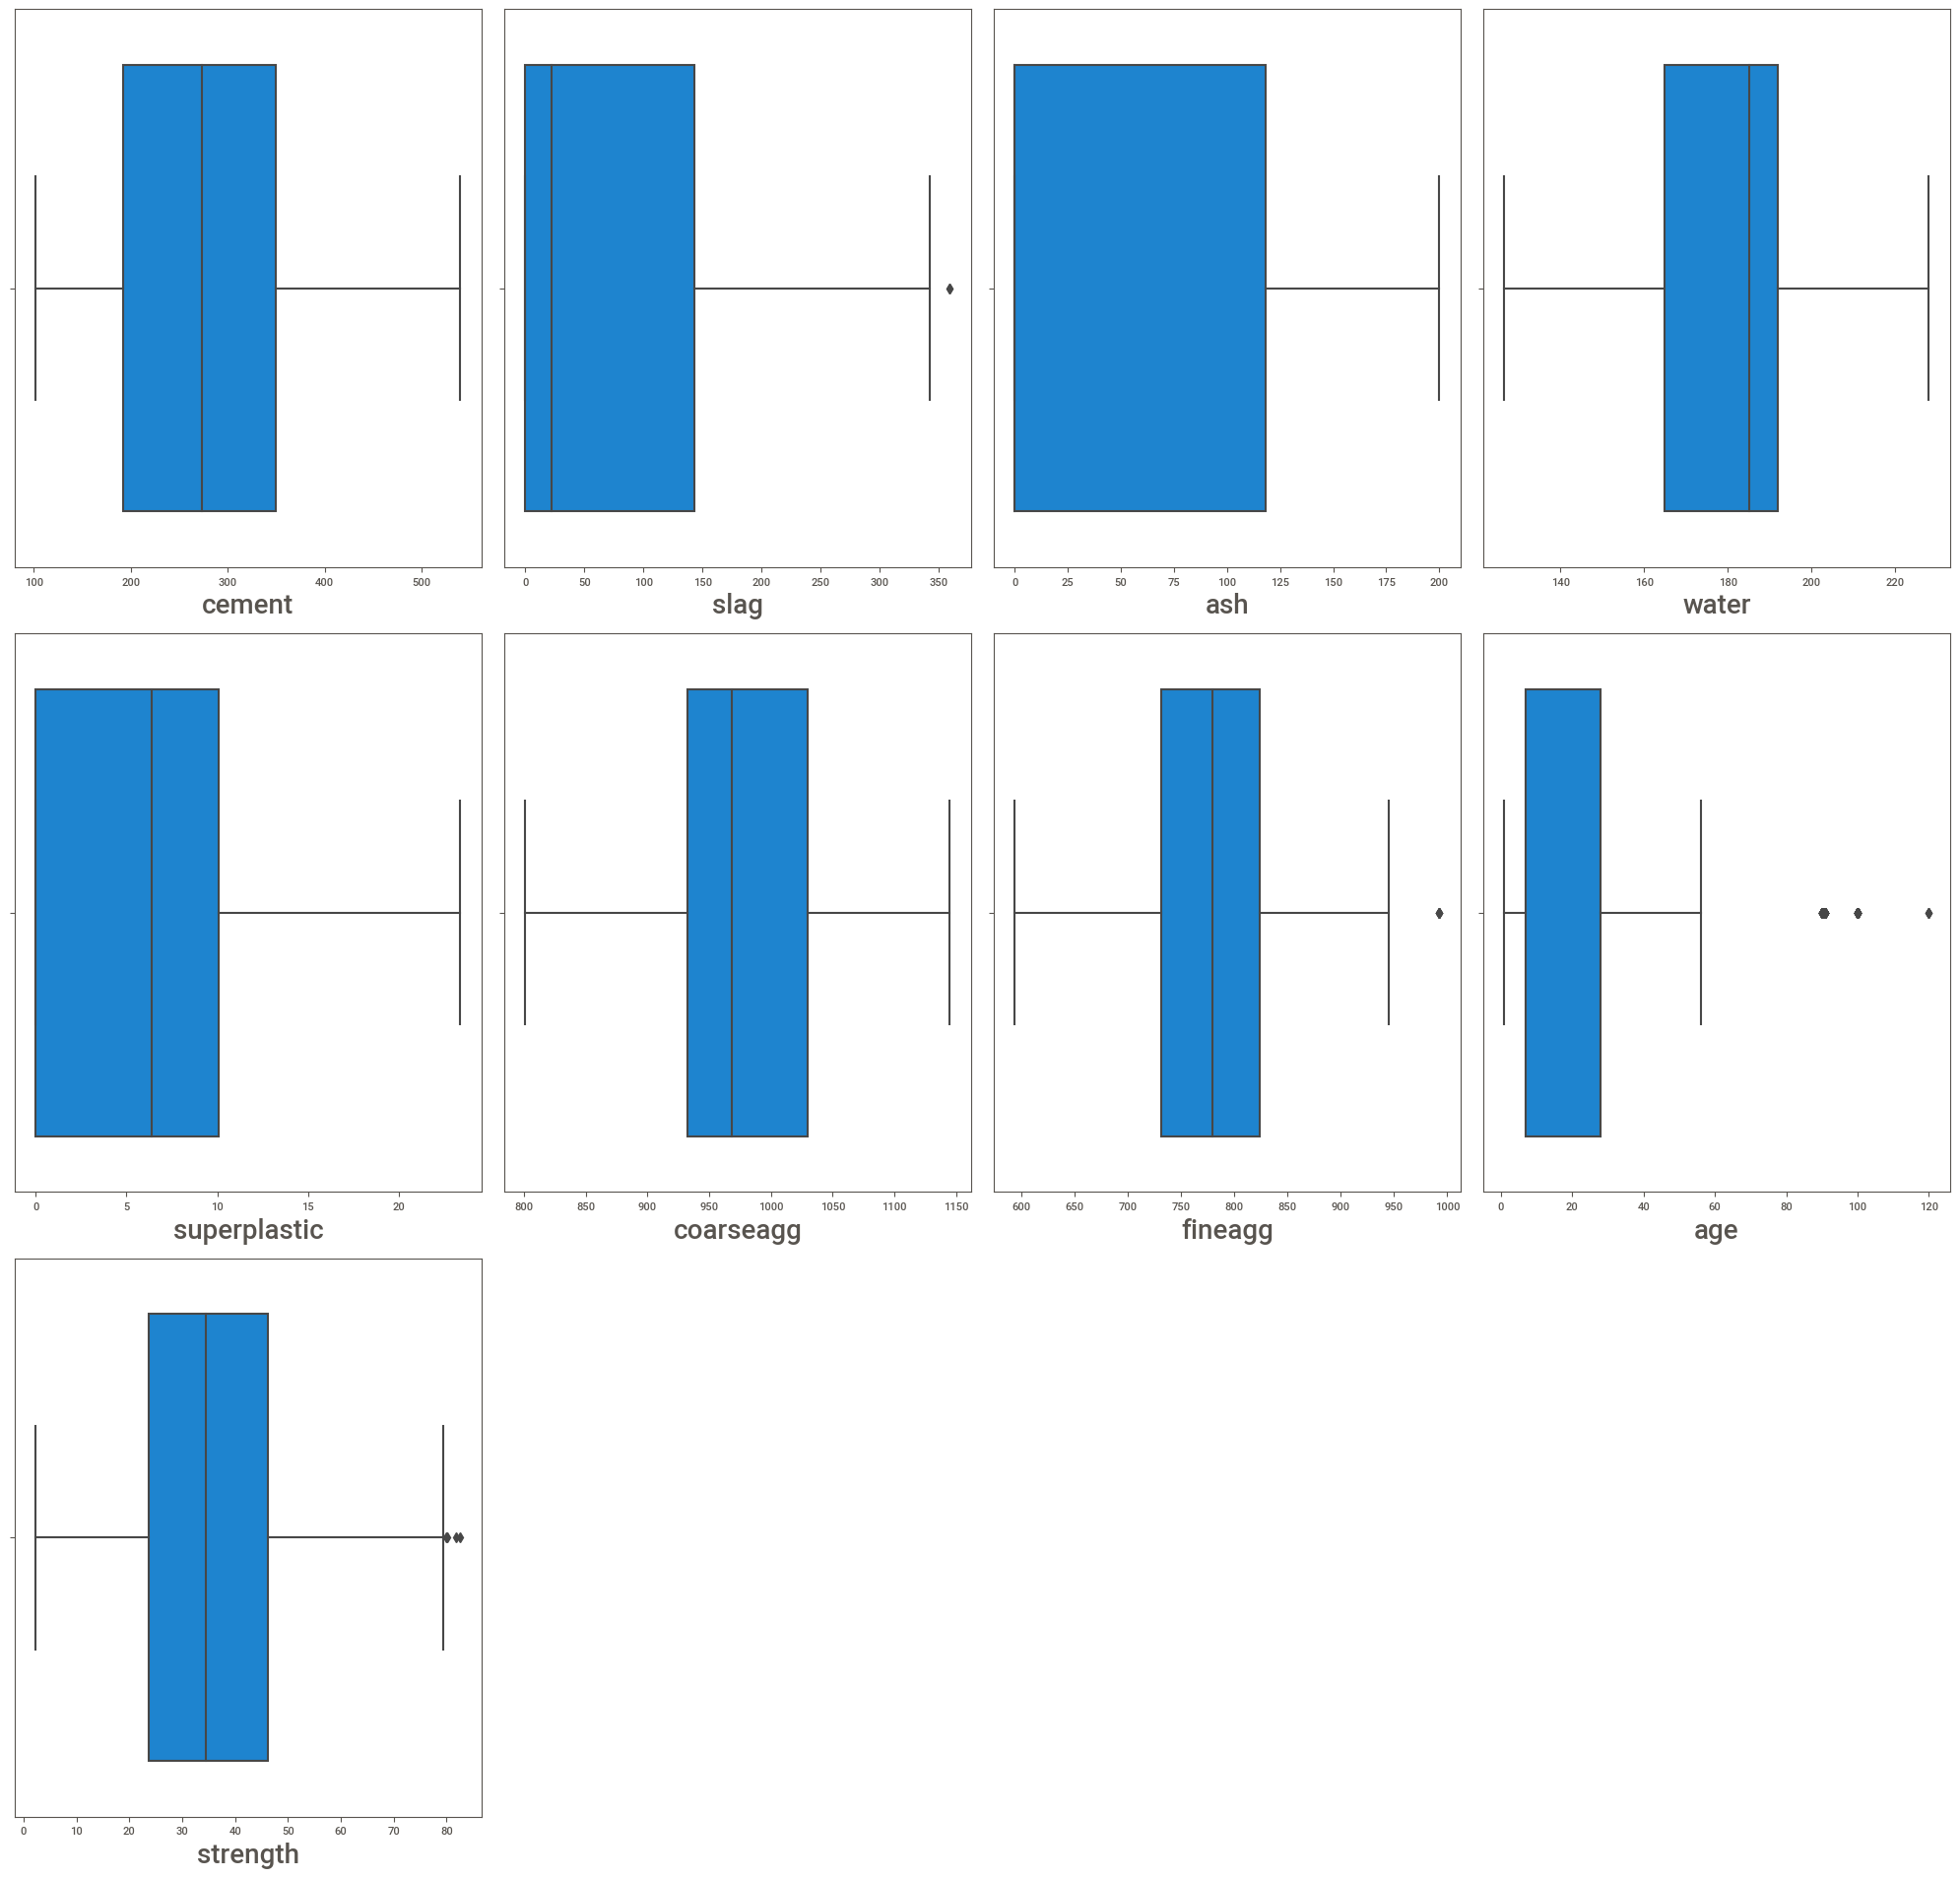

In [25]:
#boxplot(univariate)
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in df:#accessing the columns
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=df[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        #plt.ylabel('Price',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

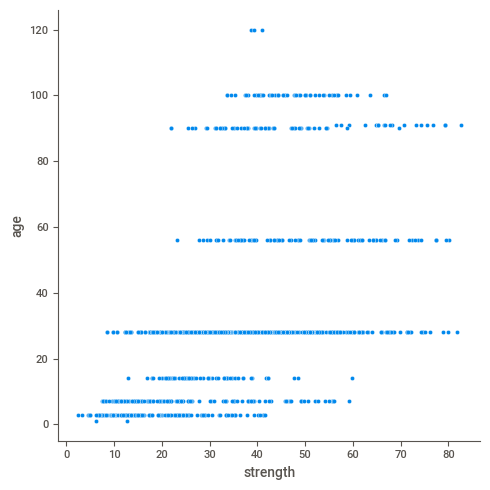

In [27]:
# Analyzing Age and Strength of Cement mix
sns.relplot(x='strength',y='age',data=df) 
# The age of the mix shows no correlation with the  more marketing on TV is leading to more sales in the product.

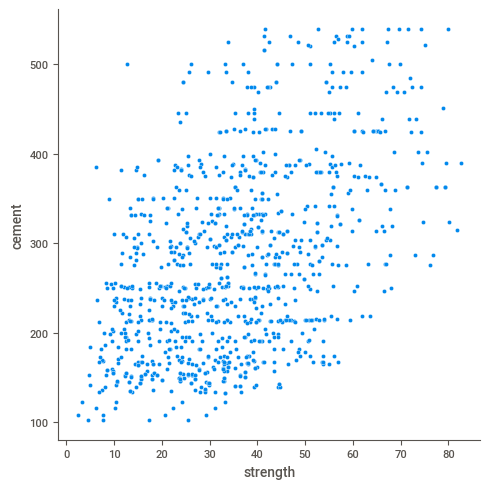

In [29]:
# Analyzing Cement and Strength of Cement mixce
sns.relplot(x='strength',y='cement',data=df) 
# The strength of the concrete shows positive correlation with the amount of cement in the ingredient mix.

<Axes: xlabel='strength', ylabel='cement'>

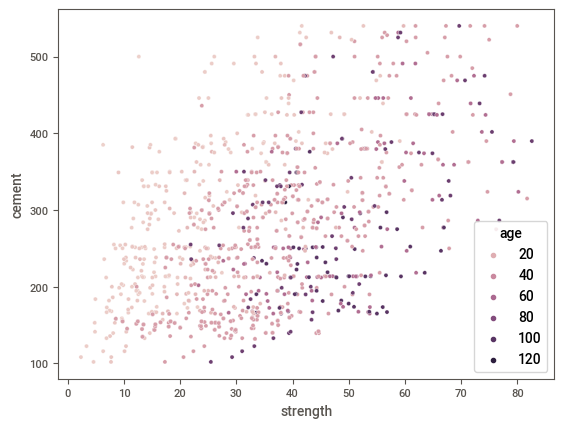

In [30]:
# Analyzing Cement and Strength of Cement mix
sns.scatterplot(x="strength", y="cement", data=df,hue="age") 


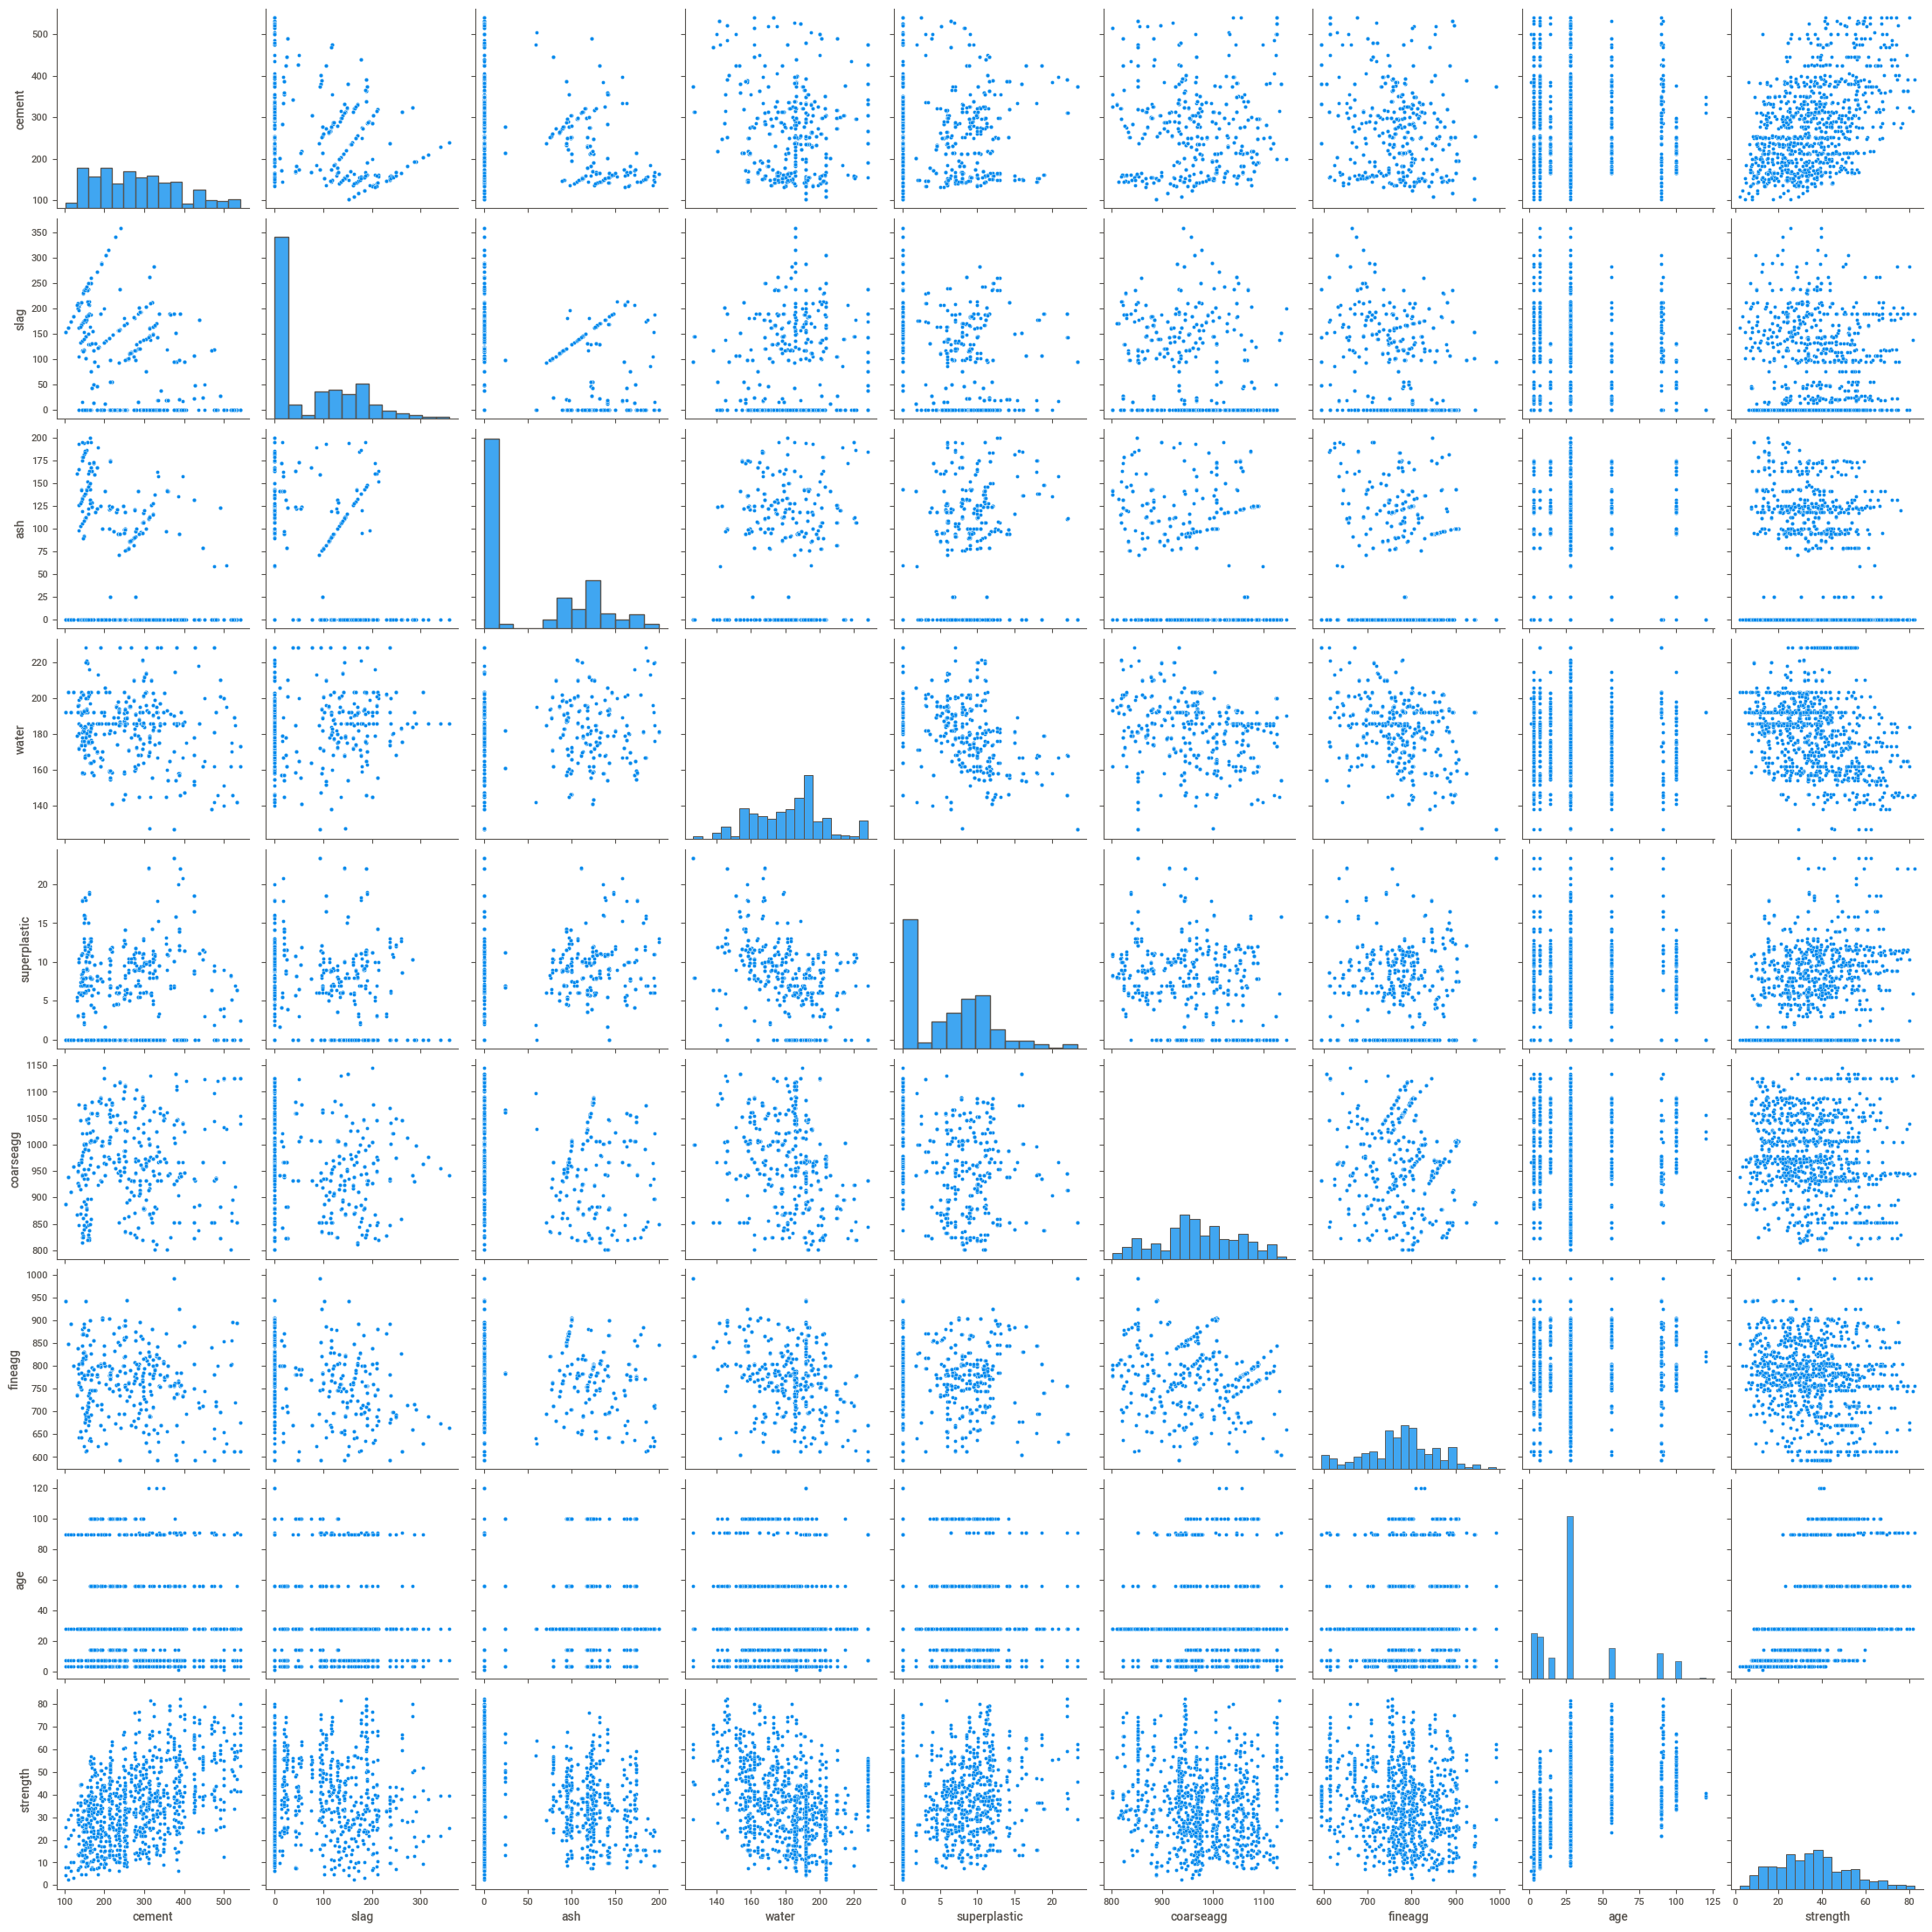

In [31]:
features_subset = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']

# Creating a pair plot
sns.pairplot(df[features_subset])
plt.show()


# Data Preprocessing and Feature Selection

                cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.091614      0.013336  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.099347      0.052270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.248011      0.447492  -0.009961   
water        -0.091614  0.099347 -0.248011  1.000000     -0.658056  -0.156928   
superplastic  0.013336  0.052270  0.447492 -0.658056      1.000000  -0.224503   
coarseagg    -0.109349 -0.283999 -0.009961 -0.156928     -0.224503   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.452978      0.194806  -0.178481   
age          -0.031962 -0.032704  0.057928 -0.040304      0.062013   0.018078   
strength      0.497832  0.134829 -0.105755 -0.307711      0.346260  -0.164935   

               fineagg       age  strength  
cement       -0.222718 -0.031962  0.497832  
slag         -0.281603 -0.032704  0.134829  
ash           0.079108  0.057928 -0.105755  
water    

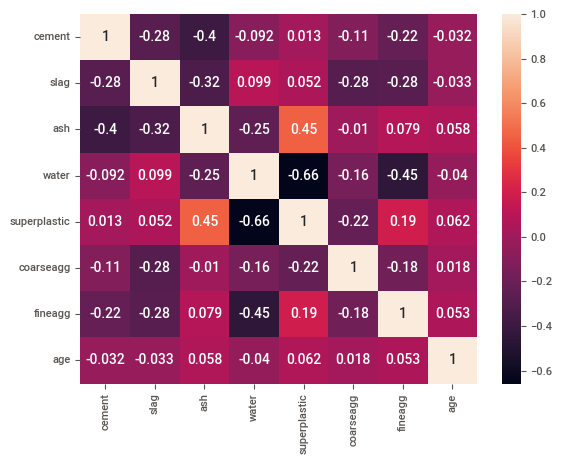

In [33]:
## Step 1 Checking the correlation
print(df.corr())
print(sns.heatmap(df.drop('strength',axis=1).corr(),annot=True))
#colinearity among the variables is substantially low, so no variables will be dropped

### Correlation feature selection:
- The correlation matrix is a square matrix that shows the pairwise correlations between all features in a dataset. It provides a comprehensive view of how each feature relates to every other feature.
- High correlation between two features implies redundancy. If two features are highly correlated, they might convey similar information to the model, potentially leading to overfitting or instability.
- By identifying and removing one of the highly correlated features, you can reduce multicollinearity and improve model interpretability.

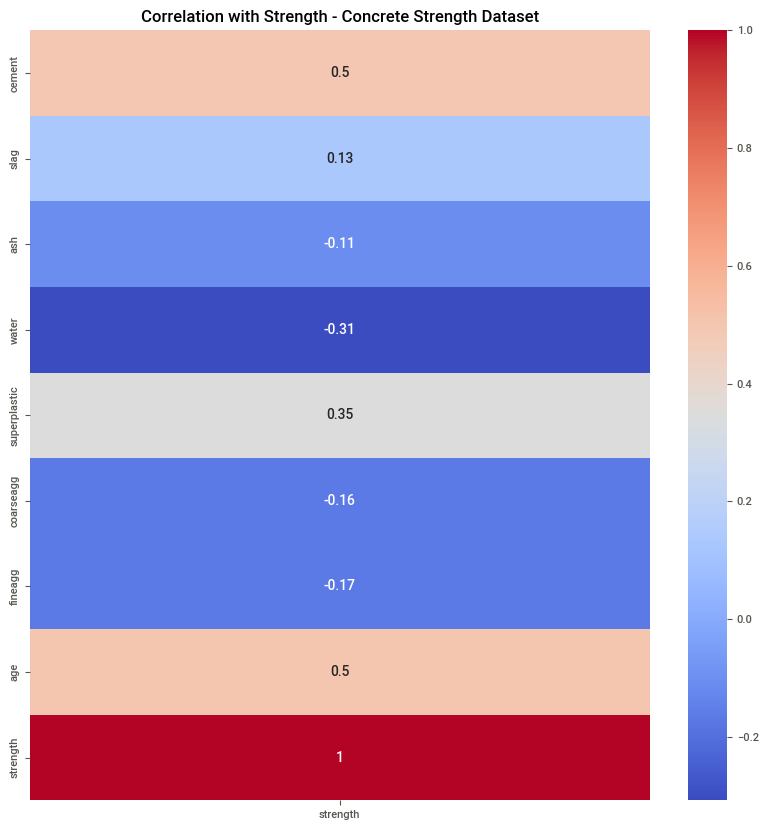

In [34]:
correlation = df.corr()[['strength']]
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation with Strength - Concrete Strength Dataset")
plt.show()


### Scaling the Data:
- Scale numerical features to bring them to a similar scale. Common techniques include Min-Max scaling or standardization (Z-score normalization).

In [35]:
#Step 2 Independent and dependent variable creation

X=df[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']] ## X variable contains all inputs
y=df.strength ## y is output

In [37]:
# Step 3 Scaling the continous variable

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.15315867],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.15315867],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709, -0.15315867],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.15315867],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.15315867],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.15315867]])

# Model Creation

In [38]:
# seperating targets and predictors 
X=df.iloc[:,:-1]
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [39]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: strength, Length: 1030, dtype: float64

# Split features:

In [41]:
# Step 1 Traning and testing data creation

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=4)


In [42]:
X_test.shape

(206, 8)

In [43]:
X_train.shape

(824, 8)

In [45]:
y_train.shape

(824,)

In [46]:
y_test.shape

(206,)

# Model Building

### Linear Regression

In [47]:
#Step-2 Creating a model

from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_predict=LR.predict(X_test)

# Model Evaluation:
- Model evaluation is a crucial step in the machine learning workflow that assesses the performance of a trained model on new, unseen data. The goal is to understand how well the model generalizes to real-world scenarios and to identify any potential issues, such as overfitting or underfitting.
- Regression Problems:
    1. Mean Absolute Error (MAE): Average absolute difference between predicted and actual values.
    2. Mean Squared Error (MSE): Average squared difference between predicted and actual values.
    3. R-squared: Proportion of the variance in the target variable explained by the model.
    4. The adjusted R-squared (R²) is a statistical measure used to assess the goodness of fit of a regression model. It is an extension of the R-squared metric, which represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model.

In [48]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
r2score=r2_score(y_test,y_predict)

In [49]:
import math
print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_predict):.2f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_predict):.2f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_predict):.2f}')
print(f'R2 Score: {r2_score(y_test, y_predict):.2f}')


Test Mean Squared Error: 91.47
Test Mean Absolute Error: 7.49
Test Mean Absolute Percentage Error: 0.29
R2 Score: 0.70


### Ridge Regression:
- Ridge Regression is a regularization technique used in linear regression. Objective Function Modification: It modifies the linear regression objective function by adding a regularization term. Regularization Term: The regularization term in Ridge Regression is L2 regularization, penalizing large coefficients by adding the sum of squared coefficients multiplied by a regularization parameter (alpha or λ). Preventing Overfitting: Ridge Regression helps prevent overfitting by penalizing large coefficients, making the model more robust and reducing sensitivity to noisy features. Handling Multicollinearity: It is effective in handling multicollinearity, a situation where predictor variables are highly correlated, by stabilizing the coefficients. Parameter Tuning: The strength of regularization is controlled by the hyperparameter alpha (λ), and tuning this parameter allows finding the right balance between fitting the training data and preventing overfitting. Ridge Regression is a regularization technique applied to linear regression, with the primary goals of preventing overfitting, stabilizing coefficients, and addressing multicollinearity.

In [51]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.1)

In [53]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [54]:
y_ridge_predict = ridge_model.predict(X_test)

In [55]:
y_ridge_predict

array([43.81517147, 57.82190972, 34.989187  , 39.48112914, 50.70553954,
       40.02293227, 45.99199228, 23.54504528, 58.09177346, 22.56049289,
       18.56790664, 37.77353736, 30.90047707, 41.51140402, 34.32263837,
       50.60374476, 23.44668027, 35.02113861, 23.02255339, 39.51409346,
       37.80712776, 48.19057308, 43.03090867, 33.48212163, 13.37696661,
       39.26353449, 22.75343757, 24.04831894, 48.69474807, 54.92720486,
       35.31870654, 36.96493839, 46.55177567, 28.96464122, 43.92376908,
       75.09014684, 46.41862967, 16.27431028, 23.5712678 , 28.27617059,
       49.24310854, 41.75126466, 55.49506459, 38.69736181, 22.79951108,
       42.19509599, 28.13676226, 31.67610816, 25.165787  , 23.91275592,
       18.29923807, 19.15832125, 28.92841251, 31.33819743, 35.67994443,
       42.69468018, 31.19848787, 29.0545496 ,  7.3986552 , 27.16146394,
       31.22489062, 19.6023455 , 38.93735628, 30.99625033, 22.90357634,
       25.31793346, 30.05108484, 45.97424   , 47.14461444, 49.05

In [57]:
r = r2_score(y_test, y_ridge_predict)
r

0.6976753411716217

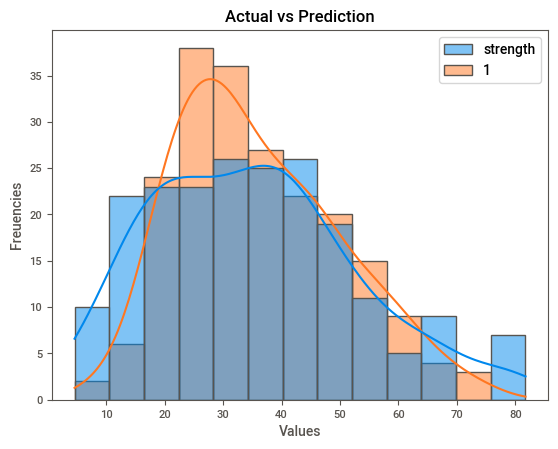

In [59]:
sns.histplot([y_test, y_predict], kde = True)
plt.xlabel('Values')
plt.ylabel('Freuencies')
plt.title('Actual vs Prediction')
plt.show()

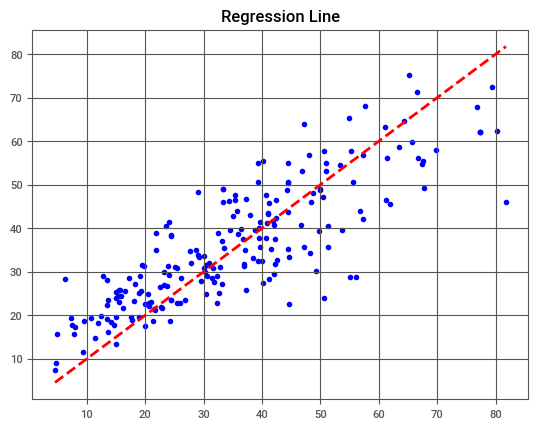

In [60]:
#Regression line 
plt.scatter(y_test, y_predict, color = 'blue', label = 'Actual vs Predicted')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color = 'red', linestyle = '--', linewidth = 2,
         label  = 'Regression_line')
plt.title("Regression Line")
plt.grid()
plt.show()

### KNN Regressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [71]:
# we are going to find best value of k
error_rate = []
for i in range(1, 11):
    Knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred !=y_test))

In [72]:
error_rate

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [74]:
## This is reference code donot run this on current dataset.
## Error calculation for regression task
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(1,20):

    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 8.518447714009325
RMSE value for k=  2 is: 7.907802509798825
RMSE value for k=  3 is: 7.928931511137321
RMSE value for k=  4 is: 7.950532191993333
RMSE value for k=  5 is: 8.1687039648906
RMSE value for k=  6 is: 8.353619939901721
RMSE value for k=  7 is: 8.46619476414442
RMSE value for k=  8 is: 8.51291967381792
RMSE value for k=  9 is: 8.717014803324908
RMSE value for k=  10 is: 8.83740107949197
RMSE value for k=  11 is: 8.97952430834397
RMSE value for k=  12 is: 9.163227988448437
RMSE value for k=  13 is: 9.310291417855964
RMSE value for k=  14 is: 9.374578695374622
RMSE value for k=  15 is: 9.427157449128451
RMSE value for k=  16 is: 9.542849061447644
RMSE value for k=  17 is: 9.614735340718067
RMSE value for k=  18 is: 9.661957176208613
RMSE value for k=  19 is: 9.653114558393066


In [75]:
# let's fit the data into KNN model and see how well it performs:
knn1 = KNeighborsRegressor(n_neighbors=3)
knn1.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [76]:
# Predict
y_pred1 = knn1.predict(X_test) 

In [77]:
len(y_test) 

206

In [78]:
# Checking Accuracy score
import math
print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_pred1):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred1):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred1):.5f}')
print(f'R2 Score: {r2_score(y_test, y_pred1):.5f}')

Test Mean Squared Error: 62.86795
Test Mean Absolute Error: 5.97421
Test Mean Absolute Percentage Error: 0.23645
R2 Score: 0.79222


### Support Vector Regression

In [79]:
# Support Vector Classifier Model

from sklearn.svm import SVR
svr_regressor = SVR() ## base model with default parameters

svr_regressor.fit(X_train,y_train)

SVR()

In [81]:
# Predict output for X_test

y_hat=svr_regressor.predict(X_test)
y_hat

array([42.12860009, 50.49931118, 29.67845004, 37.26147058, 47.40883316,
       41.57844294, 40.81328223, 21.08373105, 49.04163654, 24.94036856,
       16.83989965, 41.28607682, 29.18619823, 40.76071458, 37.0304495 ,
       47.91945343, 23.52324627, 36.56915961, 22.8457322 , 37.53379524,
       39.27337958, 46.63783581, 41.93154124, 32.82845641, 18.61258453,
       42.02777266, 20.12863283, 22.54126911, 43.96252499, 39.67109578,
       35.4513874 , 37.92236811, 42.09908374, 30.60417504, 45.45154759,
       59.22819876, 45.64704121, 18.03344155, 21.99696141, 26.53477062,
       49.1046189 , 41.58042601, 47.09775713, 39.7576103 , 22.99563135,
       44.19663431, 28.75296612, 32.07451336, 29.02999602, 34.5507261 ,
       15.50225449, 23.34195629, 28.79962317, 24.83971257, 36.34076495,
       42.46514515, 34.37422537, 26.29161059, 19.31076442, 31.64477151,
       32.15439445, 17.00287736, 32.09472725, 28.91465896, 27.13335761,
       27.4646136 , 28.59213133, 42.19845235, 44.23614087, 47.70

In [86]:
# Checking Accuracy score
import math
print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_hat):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_hat):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_hat):.5f}')
print(f'R2 Score: {r2_score(y_test, y_hat):.5f}')

Test Mean Squared Error: 88.67749
Test Mean Absolute Error: 7.26891
Test Mean Absolute Percentage Error: 0.30623
R2 Score: 0.70692


### Hyper parameter tuning for SVR:

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'C': [0.1, 5, 10, 50, 60, 70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              #'kernel': ['linear', 'rbf']
             }

# Create an SVR model
model = SVR()

# Create a GridSearchCV object
grid = GridSearchCV(model, param_grid, refit=True, verbose=2, scoring='neg_mean_squared_error', cv=5)

# Fit the model for grid search
grid.fit(X, y)

# Get the best parameters from the grid search
best_params = grid.best_params_

# Access other information such as the best estimator, score, etc.
best_estimator = grid.best_estimator_
best_score = grid.best_score_

# Now you can use the best_params, best_estimator, and best_score as needed

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

In [ ]:
reg=SVR(C=70, gamma=0.0001, kernel ='rbf') 
reg.fit(X_train, y_train)
y_reg=reg.predict(X_test)

In [87]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores_before = -cross_val_score(svr_regressor,X,y,cv=5,scoring='neg_mean_absolute_error')
print(scores_before)
print("Cross validation Score:",scores_before.mean())
print("Std :",scores_before.std())

[16.41050048 12.64103638 12.0261052  12.99059087  8.49771602]
Cross validation Score: 12.51318979033299
Std : 2.5216886459257237


In [88]:
scores_after = -cross_val_score(,X_scaled,y,cv=2,scoring='neg_mean_absolute_error')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores_after.std())
#std of < 0.05 is good.

NameError: name 'reg' is not defined

### Random Forest- Ensemble Technique

In [89]:
#model creation
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=10)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [90]:
y_predict=model.predict(X_test)
y_predict

array([53.781     , 50.158     , 17.164     , 46.099     , 47.164     ,
       42.043     , 50.559     , 25.988     , 64.614     , 24.072     ,
       13.7       , 39.33791667, 32.274     , 25.006     , 41.482     ,
       50.935     , 24.852     , 39.034     , 19.396     , 33.12      ,
       39.241     , 44.613     , 32.774     , 40.376     , 10.94      ,
       49.041     , 14.636     , 14.979     , 42.179     , 38.091     ,
       45.167     , 25.516     , 39.784     , 32.843     , 53.428     ,
       64.99      , 34.63      ,  9.637     , 28.594     , 15.902     ,
       65.757     , 43.137     , 39.297     , 36.085     , 31.193     ,
       57.13      , 18.642     , 37.33      , 31.161     , 48.19333333,
       13.554     , 15.454     , 19.763     , 21.208     , 40.709     ,
       31.399     , 31.533     , 32.1467    ,  5.945     , 20.292     ,
       27.068     , 16.414     , 20.572     , 33.15      , 26.167     ,
       17.891     , 21.865     , 42.362     , 49.86757143, 34.65

In [91]:
import math
print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_predict):.2f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_predict):.2f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_predict):.2f}')
print(f'R2 Score: {r2_score(y_test, y_predict):.2f}')


Test Mean Squared Error: 26.15
Test Mean Absolute Error: 3.56
Test Mean Absolute Percentage Error: 0.14
R2 Score: 0.91


In [92]:
#cross validation
r2_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
print(r2_scores)
# Print mean and standard deviation of R-squared scores
print("Random Forest Regressor Cross-Validation R-squared Scores:")
print("Mean R-squared:", np.mean(r2_scores))
print("Standard Deviation of R-squared:", np.std(r2_scores))

[0.88861778 0.8386917  0.86370122]
Random Forest Regressor Cross-Validation R-squared Scores:
Mean R-squared: 0.8636702298984887
Standard Deviation of R-squared: 0.020382247273112816


### Hyper parameter tuning for Randomforest 

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=10)],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [97]:
# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42
)

In [98]:
# Fit the model
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [99]:
# Print the best parameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}


In [100]:
# Evaluate the model on the test set
y_pred = random_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)
r = r2_score(y_test, y_pred)
print(f"Best Model R2 score: {r}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Best Model Mean Absolute Error: {mae}")

Mean Squared Error on Test Set: 28.273292380832135
Best Model R2 score: 0.906556138270516
Best Model Mean Absolute Error: 3.9045356423150634


### Decision tree

In [101]:
X=df[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']] ## X variable contains all inputs
y=df.strength ## y is output

In [102]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=14)

In [103]:
from sklearn.tree import DecisionTreeRegressor #importing decision tree from sklearn.tree
dt=DecisionTreeRegressor() #object creation for decision tree

dt.fit(x_train,y_train) #training the model

y_pred2=dt.predict(x_test) #prediction

In [104]:
# Checking Accuracy score
import math
print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_pred2):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred2):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred2):.5f}')
print(f'R2 Score: {r2_score(y_test, y_pred2):.5f}')

Test Mean Squared Error: 57.73059
Test Mean Absolute Error: 4.93547
Test Mean Absolute Percentage Error: 0.16291
R2 Score: 0.80528


In [106]:
y_train_predict = dt.predict(x_train)
print(f'R2 Score: {r2_score(y_train, y_train_predict):.2f}')


R2 Score: 0.99


### Hyper paramter tuning for Deciaion tree

In [107]:
from sklearn.model_selection import GridSearchCV


In [ ]:
params = {
    "criterion":('friedman_mse', 'poisson', 'squared_error', 'absolute_error'), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2,20],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}

tree_reg = DecisionTreeRegressor(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_reg, params, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods

tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_ #it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters

In [ ]:
#fitting 3 folds for each of 4332 candidates, totalling 12996 fits
tree_cv.best_params_#getting best parameters from cv

In [ ]:
tree_cv.best_score_#getting best score form cv

In [ ]:
dt1=DecisionTreeRegressor(criterion='poisson',max_depth=17,min_samples_leaf

In [ ]:
dt1.fit(x_train,y_train)#traing model with best parameter

In [ ]:
y_pred22=dt1.predict(x_test)#predicting
y_pred22

In [ ]:
# Checking Accuracy score
import math
print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_pred22):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred22):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred22):.5f}')
print(f'R2 Score: {r2_score(y_test, y_pred22):.5f}')

# ANN Regressor 

In [109]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
# Create and train the Neural Network model
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 50),  # Adjust the number of neurons and layers
                     activation='relu',  # Use ReLU activation function
                     solver='adam',  # Adam optimizer
                     max_iter=500,  # Maximum number of iterations
                     random_state=42)

model.fit(X_train_scaled, y_train) ## training the data 

## prediction
y_pred_ann = model.predict(X_test_scaled)

In [111]:
# Checking Accuracy score
import math
print(f'Test Mean Squared Error: {mean_squared_error(y_test, y_pred_ann):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ann):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_ann):.5f}')
print(f'R2 Score: {r2_score(y_test, y_pred_ann):.5f}')

Test Mean Squared Error: 36.17499
Test Mean Absolute Error: 4.25906
Test Mean Absolute Percentage Error: 0.12581
R2 Score: 0.85961


# XGB Regressor

In [120]:
from sklearn.ensemble import GradientBoostingRegressor

In [122]:
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price

In [123]:
# Checking Accuracy score
import math
print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_gbm):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_gbm):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_gbm):.5f}')
print(f'R2 Score: {r2_score(y_test, y_gbm):.5f}')


Test Mean Squared Error: 33.02850
Test Mean Absolute Error: 4.32163
Test Mean Absolute Percentage Error: 0.13598
R2 Score: 0.87182


In [126]:
!pip3 install xgboost

In [127]:
import xgboost

In [130]:
from xgboost import XGBRegressor#importing the model library

In [132]:
xgb_r=XGBRegressor() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [135]:
y_hat_xgb=xgb_r.predict(X_test) #predicting the strength of concrete

In [136]:
# Checking Accuracy score
import math
print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_hat_xgb):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_hat_xgb):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_hat_xgb):.5f}')
print(f'R2 Score: {r2_score(y_test, y_hat_xgb):.5f}')


Test Mean Squared Error: 26.66042
Test Mean Absolute Error: 3.49047
Test Mean Absolute Percentage Error: 0.10873
R2 Score: 0.89654


### Hyper parameter tuning for XGBoost

In [138]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBRegressor(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='neg_mean_absolute_error',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters
print(f"Best paramters: {cv_best_params})")##printing  best parameter

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 12.8, 'reg_alpha': 0.8, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.5, 'gamma': 0})


In [140]:
XGB2=XGBRegressor(reg_lambda= 12.8, reg_alpha= 0.1, n_estimators=150, max_depth=5, learning_rate=0.1, gamma=0.8)
XGB2.fit(X_train, y_train)#training
y_predict_xgb2=XGB2.predict(X_test)#testing

In [141]:
# Checking Accuracy score
import math
print(f'Test Mean Squared Error: {mean_squared_error(y_test, y_predict_xgb2):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_predict_xgb2):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_predict_xgb2):.5f}')
print(f'R2 Score: {r2_score(y_test, y_predict_xgb2):.5f}')

Test Mean Squared Error: 26.98379
Test Mean Absolute Error: 3.70270
Test Mean Absolute Percentage Error: 0.11567
R2 Score: 0.89528


# Model Performance Summary

In [159]:
# Assuming compiled_results is your DataFrame
data = {
    'Model': ['LR', 'KNN', 'SVR', 'DT','RF', 'RR', 'XGB', 'ANN'],
    'MSE': [91.47, 62.86, 88.6, 57.73, 26.15, 47.7, 26.66, 33.02],
    'MAE': [7.49, 5.9, 7.2, 4.93, 3.56,3.50, 3.49, 4.3],
    'MAPE': [0.28, 0.23, 0.17, 0.14, 0.12, 0.11, 0.10, 0.13],
    'R-squared': [0.72, 0.80, 0.85, 0.87, 0.92, 0.89, 0.93, 0.86],
    # Add other metrics as needed
}

compiled_results = pd.DataFrame(data)
compiled_results.set_index('Model', inplace=True)
print(compiled_results)

         MSE   MAE  MAPE  R-squared
Model                              
LR     91.47  7.49  0.28       0.72
KNN    62.86  5.90  0.23       0.80
SVR    88.60  7.20  0.17       0.85
DT     57.73  4.93  0.14       0.87
RF     26.15  3.56  0.12       0.92
RR     47.70  3.50  0.11       0.89
XGB    26.66  3.49  0.10       0.93
ANN    33.02  4.30  0.13       0.86


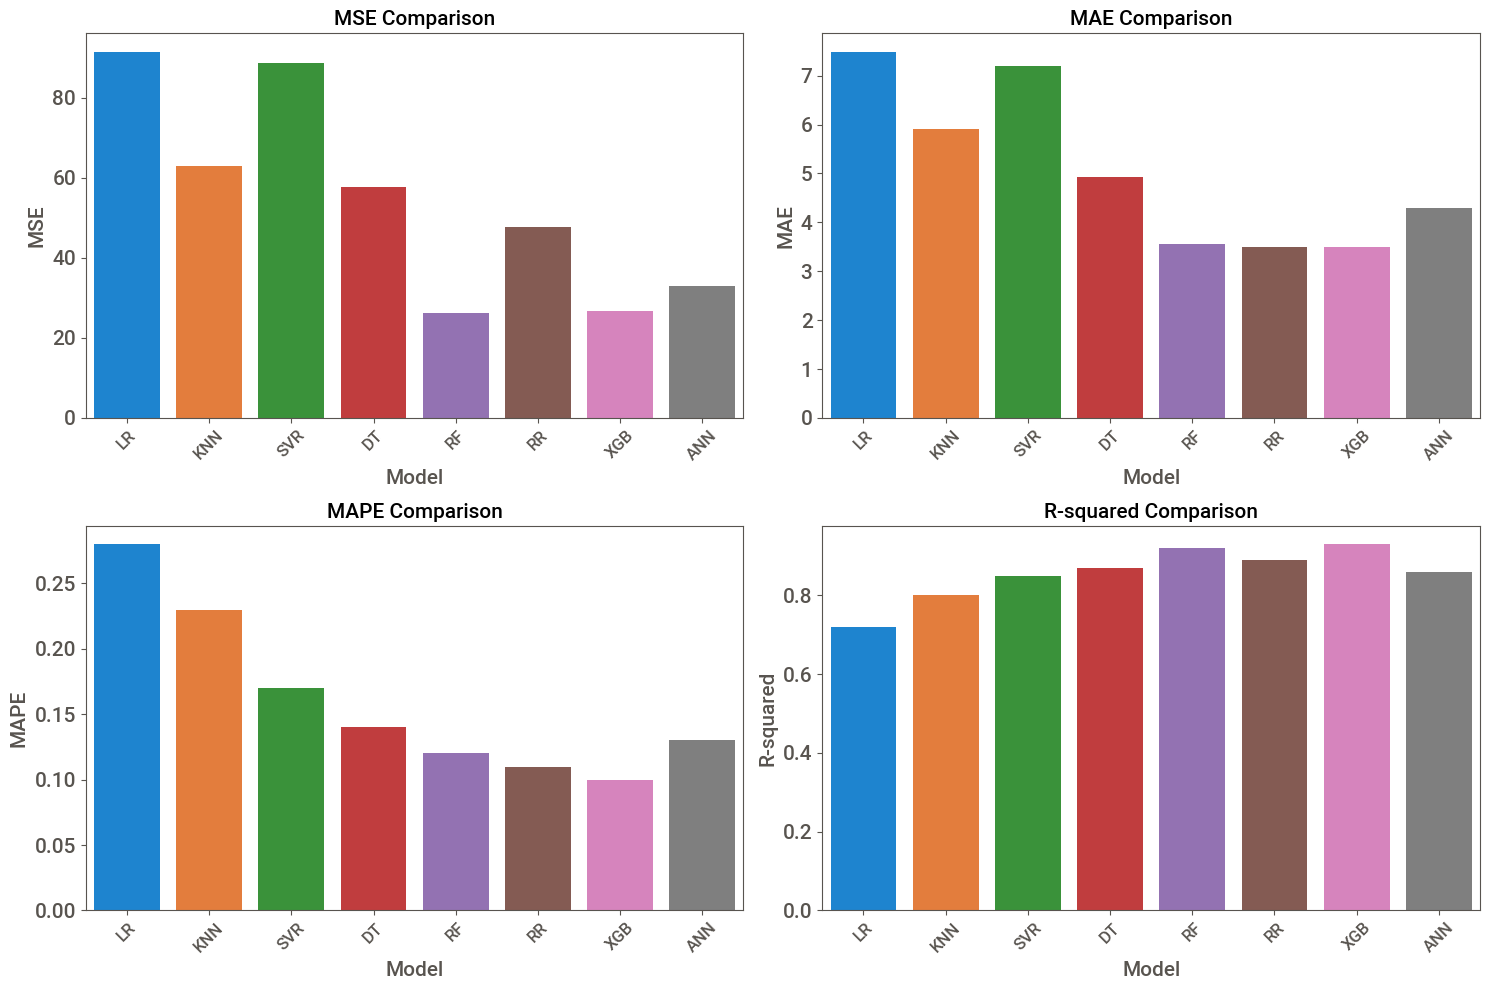

In [160]:
# Extracting metric columns
metrics = compiled_results.columns  # Exclude 'Model'

# Number of subplots
num_plots = len(metrics)

# Create a subplot with a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the 2x2 subplot grid for iteration
axes = axes.flatten()

# Loop through each metric and create a bar plot on each axis
for i, metric in enumerate(metrics):
    sns.barplot(x=compiled_results.index, y=compiled_results[metric], ax=axes[i])
    axes[i].set_title(f'{metric} Comparison',fontsize=15)
    axes[i].set_ylabel(metric,fontsize=15)
    axes[i].set_xlabel('Model',fontsize=15)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y',labelsize=15)

# Adjust layout
plt.tight_layout()
plt.show()

### Data Analysis Summary and Model Comparison report:

1. Dataset Analysis Overview
- The dataset consists of 1036 samples with 8 features.
- The data points are dispersed, showing wide variations between min and max
- More than 55% of tested cement do not contain ash in the mix.
- About 46% of cement do not have slag while superplastic additive was absent in about 37% of cement tested
- About 40% of the cement mix were left for just about a month
- Overall, the mix ratio did not were not uniformly distributed, probably because there is no linear relationship between concrete strength and the ingredients
- Though few datapoints, they are complete with no missing values
- The variage age seems to be the only non floating continuous variable
2. Models Used
- Linear Regression (LR)
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Decision Tree (DT)
- Random Forest (RF)
- Ridge regressor (RR)
- Gradient Boosting (GB)
- XGBoost (XGB)
- Artificial Neural Network (ANN)
3. Evaluation Metrics
- We employed Mean Squared Error (MSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error and R-squared as our primary evaluation metrics.

- Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values.
- Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values.
- Mean Absolute Percentage Error (MAPE): Measures the percentage difference between actual and predicted values.
- R-squared (R²): Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
4. Model Comparison
- Observations Random Forest (RF) achieved the lowest MSE, indicating superior performance in minimizing the squared differences between predicted and actual values. Gradient Boosting (GB) and XGBoost (XGB) showed high R² values, suggesting a good fit to the data. Support Vector Machine (SVM) demonstrated competitive performance across multiple metrics.

# Conclusion:

- In this study, we aimed to predict concrete strength using various regression models. We considered three models: Linear Regression, Random Forest Regressor, and XGBoost Regressor. The following summarizes our key findings:

1. **Model Performance:**
   - All three models demonstrated reasonable predictive performance, as indicated by evaluation metrics on the test set.
   - The XGBoost Regressor achieved the lowest Mean Squared Error (MSE), suggesting superior accuracy in predicting concrete strength.
   - Random Forest Regressor also performed well, while Linear Regression showed competitive results.

2. **Hyperparameter Tuning:**
   - Hyperparameter tuning was performed to optimize the models further.
   - XGBoost Regressor benefited significantly from tuning, resulting in improved performance.

3. **Model Strengths and Weaknesses:**
   - Linear Regression, despite its simplicity, provided a good baseline performance.
   - Random Forest Regressor demonstrated robustness and resilience to overfitting, producing consistent results.
   - XGBoost Regressor, with careful hyperparameter tuning, outperformed other models, showcasing its ability to capture complex patterns in the data.

4. **Recommendations:**
   - For simplicity and interpretability, Linear Regression may suffice in scenarios where predictive accuracy is not the sole focus.
   - Random Forest Regressor is a reliable choice, offering a good balance between interpretability and performance.
   - XGBoost Regressor, with its powerful modeling capabilities, is recommended when high accuracy is crucial, and the interpretability trade-off is acceptable.